### Project Objective:

The project is aimed at determing the optimal interest rate for the personal loans given by the bank. We would also seggregate the customers into different clusters on the basis of the given features and come up with some marketing & credit recommendations on the basis of the customer's entire banking relationship. This would give a boost to the bank's sales, help the bank in credit decisioning & boost it's profitability.

I have taken a banking loan dataset. On the basis of the 54 features or independent variables the goal of this project is to determine the the interest rate or the loan pricing for the personal loan dataset.
Defining the Independent Variables:
emp_title: Job title, emp_length: Number of years in the job, rounded down. If longer than 10 years, then this is represented by the value 10,homeownership: The ownership status of the applicant's residence, annual_income: Annual income,verified_income: Type of verification of the applicant's income,debt_to_income: Debt-to-income ratio,annual_income_joint: If this is a joint application, then the annual income of the two parties applying, verification_income_joint: Type of verification of the joint income, debt_to_income_joint:Debt-to-income ratio for the two parties,delinq_2y:
Delinquencies on lines of credit in the last 2 years, months_since_last_delinq: Months since the last delinquency, earliest_credit_line:Year of the applicant's earliest line of credit, inquiries_last_12m:Inquiries into the applicant's credit during the last 12 months,total_credit_lines:Total number of credit lines in this applicant's credit history,open_credit_lines:Number of currently open lines of credit,total_credit_limit:Total available credit, e.g. if only credit cards, then the total of all the credit limits. This excludes a mortgage,total_credit_utilized: Total credit balance, excluding a mortgage,num_collections_last_12m:Number of collections in the last 12 months. This excludes medical collections,num_historical_failed_to_pay: The number of derogatory public records, which roughly means the number of times the applicant failed to pay,
months_since_90d_late:Months since the last time the applicant was 90 days late on a payment,current_accounts_delinq: Number of accounts where the applicant is currently delinquent,total_collection_amount_ever:The total amount that the applicant has had against them in collections,current_installment_accounts:Number of installment accounts, which are (roughly) accounts with a fixed payment amount and period. A typical example might be a 36-month car loan,accounts_opened_24m:Number of new lines of credit opened in the last 24 months,months_since_last_credit_inquiry:Number of months since the last credit inquiry on this applicant,num_satisfactory_accounts:Number of satisfactory accounts,num_accounts_120d_past_due:Number of current accounts that are 120 days past due,num_accounts_30d_past_due:Number of current accounts that are 30 days past due,num_active_debit_accounts:Number of currently active bank cards,total_debit_limit:Total of all bank card limits,
num_total_cc_accounts:Total number of credit card accounts in the applicant's history,num_open_cc_accounts:Total number of currently open credit card accounts,num_cc_carrying_balance:Number of credit cards that are carrying a balance,num_mort_accounts:Number of mortgage accounts,account_never_delinq_percent:Percent of all lines of credit where the applicant was never delinquent,tax_liens:a numeric vector,public_record_bankrupt:Number of bankruptcies listed in the public record for this applicant,loan_purpose:The category for the purpose of the loan,application_type:The type of application: either individual or joint,loan_amount:The amount of the loan the applicant received,term:The number of months of the loan the applicant received,installment:Monthly payment for the loan the applicant received,grade:Grade associated with the loan,sub_grade:Detailed grade associated with the loan,issue_month:Month the loan was issued,loan_status:Status of the loan,initial_listing_status:Initial listing status of the loan. (I think this has to do with whether the lender provided the entire loan or if the loan is across multiple lenders.),disbursement_method:Dispersement method of the loan,balance:Current balance on the loan,paid_total:Total that has been paid on the loan by the applicant,paid_principal:The difference between the original loan amount and the current balance on the loan,paid_interest:The amount of interest paid so far by the applicant, paid_late_fees: Late fees paid by the applicant.

In [1241]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [1242]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV

In [1243]:
dataset = pd.read_csv('C:/Users/chowd/Downloads/loans_full_schema.csv')

In [1244]:
# Due to difficulty in running the machine learning models in laptop I've reduced the dataset to 5000 records instead of 10000

import random
# Converting dataframe to list of tuples (each row as a tuple)
data_list = dataset.values.tolist()
# Selecting 5000 rows randomly from the dataset
random_sample = random.sample(data_list, 5000)
# Converting back to DataFrame 
df = pd.DataFrame(random_sample,columns=dataset.columns)
print(df)

                          emp_title  emp_length state homeownership  \
0                               NaN         NaN    CA      MORTGAGE   
1                   painter/blaster         2.0    LA           OWN   
2                      c&c operator        10.0    NY      MORTGAGE   
3                        it manager        10.0    WA      MORTGAGE   
4                equipment operator        10.0    ID      MORTGAGE   
...                             ...         ...   ...           ...   
4995                          owner        10.0    AZ          RENT   
4996                            NaN         NaN    MI           OWN   
4997  shipping/receiving supervisor        10.0    IL      MORTGAGE   
4998               accounts payable         0.0    TX          RENT   
4999                        manager         4.0    NY          RENT   

      annual_income  verified_income  debt_to_income  annual_income_joint  \
0           40000.0         Verified            7.20                  

In [1390]:
df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,paid_total,paid_principal,paid_interest,paid_late_fees,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,NaN,5.904098,CA,MORTGAGE,40000.0,Verified,7.20,125886.170209,NaN,20.321311,...,1115.21,481.59,633.62,0.0,False,False,True,False,False,False
1,painter/blaster,2.000000,LA,OWN,45000.0,Source Verified,15.95,125886.170209,NaN,20.321311,...,1469.92,1046.54,423.38,0.0,False,True,False,False,False,False
2,c&c operator,10.000000,NY,MORTGAGE,53000.0,Source Verified,8.88,125886.170209,NaN,20.321311,...,1928.52,896.07,1032.45,0.0,False,True,False,False,False,False
3,it manager,10.000000,WA,MORTGAGE,90000.0,Not Verified,36.16,125886.170209,NaN,20.321311,...,2240.59,1364.49,876.10,0.0,True,False,False,False,False,False
4,equipment operator,10.000000,ID,MORTGAGE,48000.0,Not Verified,20.13,125886.170209,NaN,20.321311,...,1214.98,1023.44,191.54,0.0,False,False,False,False,False,False
5,NaN,5.904098,FL,OWN,53232.0,Source Verified,6.33,125886.170209,NaN,20.321311,...,462.70,257.83,204.87,0.0,False,False,True,False,False,False
6,exam coordinator/technology specialist,4.000000,IL,MORTGAGE,69000.0,Source Verified,28.74,125886.170209,NaN,20.321311,...,1484.90,1206.83,278.07,0.0,False,False,False,False,False,False
7,welder,4.000000,TX,RENT,28000.0,Verified,65.20,60000.000000,Source Verified,32.920000,...,1018.54,682.55,335.99,0.0,False,True,False,False,False,False
8,loan processor,5.000000,SC,MORTGAGE,27480.0,Verified,24.89,125886.170209,NaN,20.321311,...,428.73,284.95,143.78,0.0,False,True,False,False,False,False
9,food service supervisor,10.000000,FL,RENT,58000.0,Verified,17.96,125886.170209,NaN,20.321311,...,836.19,549.17,287.02,0.0,False,True,False,False,False,False


In [1246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         4580 non-null   object 
 1   emp_length                        4588 non-null   float64
 2   state                             5000 non-null   object 
 3   homeownership                     5000 non-null   object 
 4   annual_income                     5000 non-null   float64
 5   verified_income                   5000 non-null   object 
 6   debt_to_income                    4988 non-null   float64
 7   annual_income_joint               717 non-null    float64
 8   verification_income_joint         695 non-null    object 
 9   debt_to_income_joint              717 non-null    float64
 10  delinq_2y                         5000 non-null   int64  
 11  months_since_last_delinq          2169 non-null   float64
 12  earlie

In [1247]:
df.shape

(5000, 55)

In [1364]:
df.loan_status.value_counts()

loan_status
Current               4674
Fully Paid             226
In Grace Period         38
Late (31-120 days)      34
Late (16-30 days)       23
Charged Off              5
Name: count, dtype: int64

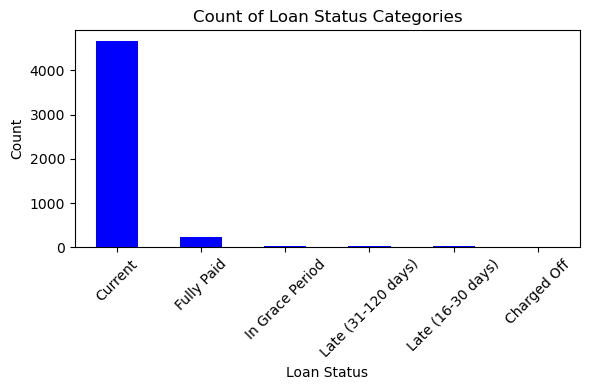

In [1388]:
# Counting the occurrences of each category
loan_status_counts = df['loan_status'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
loan_status_counts.plot(kind='bar', color='blue')

# Customize the plot
plt.title('Count of Loan Status Categories')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [1366]:
df.homeownership.value_counts()

homeownership
MORTGAGE    2425
RENT        1919
OWN          656
Name: count, dtype: int64

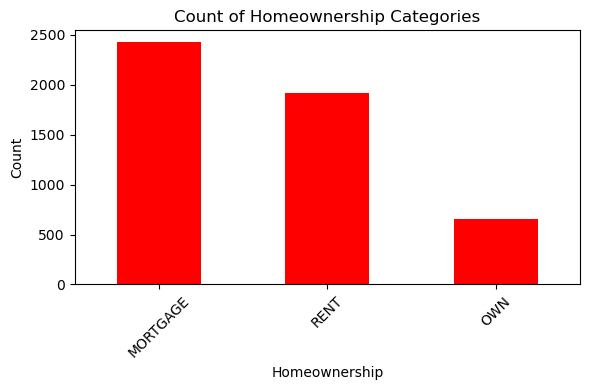

In [1386]:
# Counting the occurrences of each category
homeownership_counts = df['homeownership'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
homeownership_counts.plot(kind='bar', color='red')

# Customize the plot
plt.title('Count of Homeownership Categories')
plt.xlabel('Homeownership')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


In [1248]:
# Statistical features of the numeric columns:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
emp_length,4588.0,5.904098,3.725477,0.00,2.0000,6.000,10.0000,1.000000e+01
annual_income,5000.0,80215.358112,70554.532560,0.00,45000.0000,65000.000,95590.0000,2.300000e+06
debt_to_income,4988.0,19.353805,15.805831,0.00,11.0400,17.615,24.9300,4.690900e+02
annual_income_joint,717.0,125886.170209,68700.981374,25092.00,86447.0000,113000.000,150839.0000,1.100000e+06
debt_to_income_joint,717.0,20.321311,8.203578,0.32,14.3300,20.340,25.9300,3.993000e+01
delinq_2y,5000.0,0.220200,0.686882,0.00,0.0000,0.000,0.0000,1.000000e+01
months_since_last_delinq,2169.0,36.506224,21.721189,1.00,18.0000,33.000,53.0000,1.180000e+02
earliest_credit_line,5000.0,2001.268800,7.944405,1963.00,1997.0000,2003.000,2007.0000,2.015000e+03
inquiries_last_12m,5000.0,1.983200,2.425798,0.00,0.0000,1.000,3.0000,2.600000e+01
total_credit_lines,5000.0,22.780600,11.761026,2.00,14.0000,21.000,29.2500,8.000000e+01


In [1249]:
# Some columns are numerical and some are non-numerical
non_numeric_columns = df.select_dtypes(['object']).columns
print(non_numeric_columns)
print('The number of non-numeric columns is {}'.format(len(non_numeric_columns)))

Index(['emp_title', 'state', 'homeownership', 'verified_income',
       'verification_income_joint', 'loan_purpose', 'application_type',
       'grade', 'sub_grade', 'issue_month', 'loan_status',
       'initial_listing_status', 'disbursement_method'],
      dtype='object')
The number of non-numeric columns is 13


In [1250]:
# The numerical columns
numeric_columns = df.select_dtypes(['int64','float']).columns
print(numeric_columns)
print('The number of numeric columns is {}'.format(len(numeric_columns)))

Index(['emp_length', 'annual_income', 'debt_to_income', 'annual_income_joint',
       'debt_to_income_joint', 'delinq_2y', 'months_since_last_delinq',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'balance',
       'paid_total', '

In [1251]:
# Deriving Correlations of the Features with our target variable 'Interest Rate' irrespective of their signs by taking the absolute values
correlation_df = np.abs(df[numeric_columns].iloc[:,0:].corr().loc[:,'interest_rate']).sort_values(ascending=False)
print(correlation_df)

interest_rate                       1.000000
paid_interest                       0.517961
term                                0.362682
debt_to_income_joint                0.283040
total_debit_limit                   0.250370
annual_income_joint                 0.173321
debt_to_income                      0.136985
inquiries_last_12m                  0.136245
num_mort_accounts                   0.135990
accounts_opened_24m                 0.125621
months_since_last_credit_inquiry    0.124662
account_never_delinq_percent        0.123594
total_credit_limit                  0.121514
annual_income                       0.101871
earliest_credit_line                0.099235
installment                         0.095062
delinq_2y                           0.086802
months_since_last_delinq            0.080191
num_cc_carrying_balance             0.078886
num_total_cc_accounts               0.069913
balance                             0.066255
loan_amount                         0.059568
paid_total

We observe that some of the features (top 9) having high correlation with interest rate and therefore having strong informative and predictive power are 'paid_interest', 'term', 'debt_to_income_joint', 'total_debit_limit', 'annual_income_joint','debt_to_income','num_mort_accounts','inquiries_last_12m','total_credit_limit'.

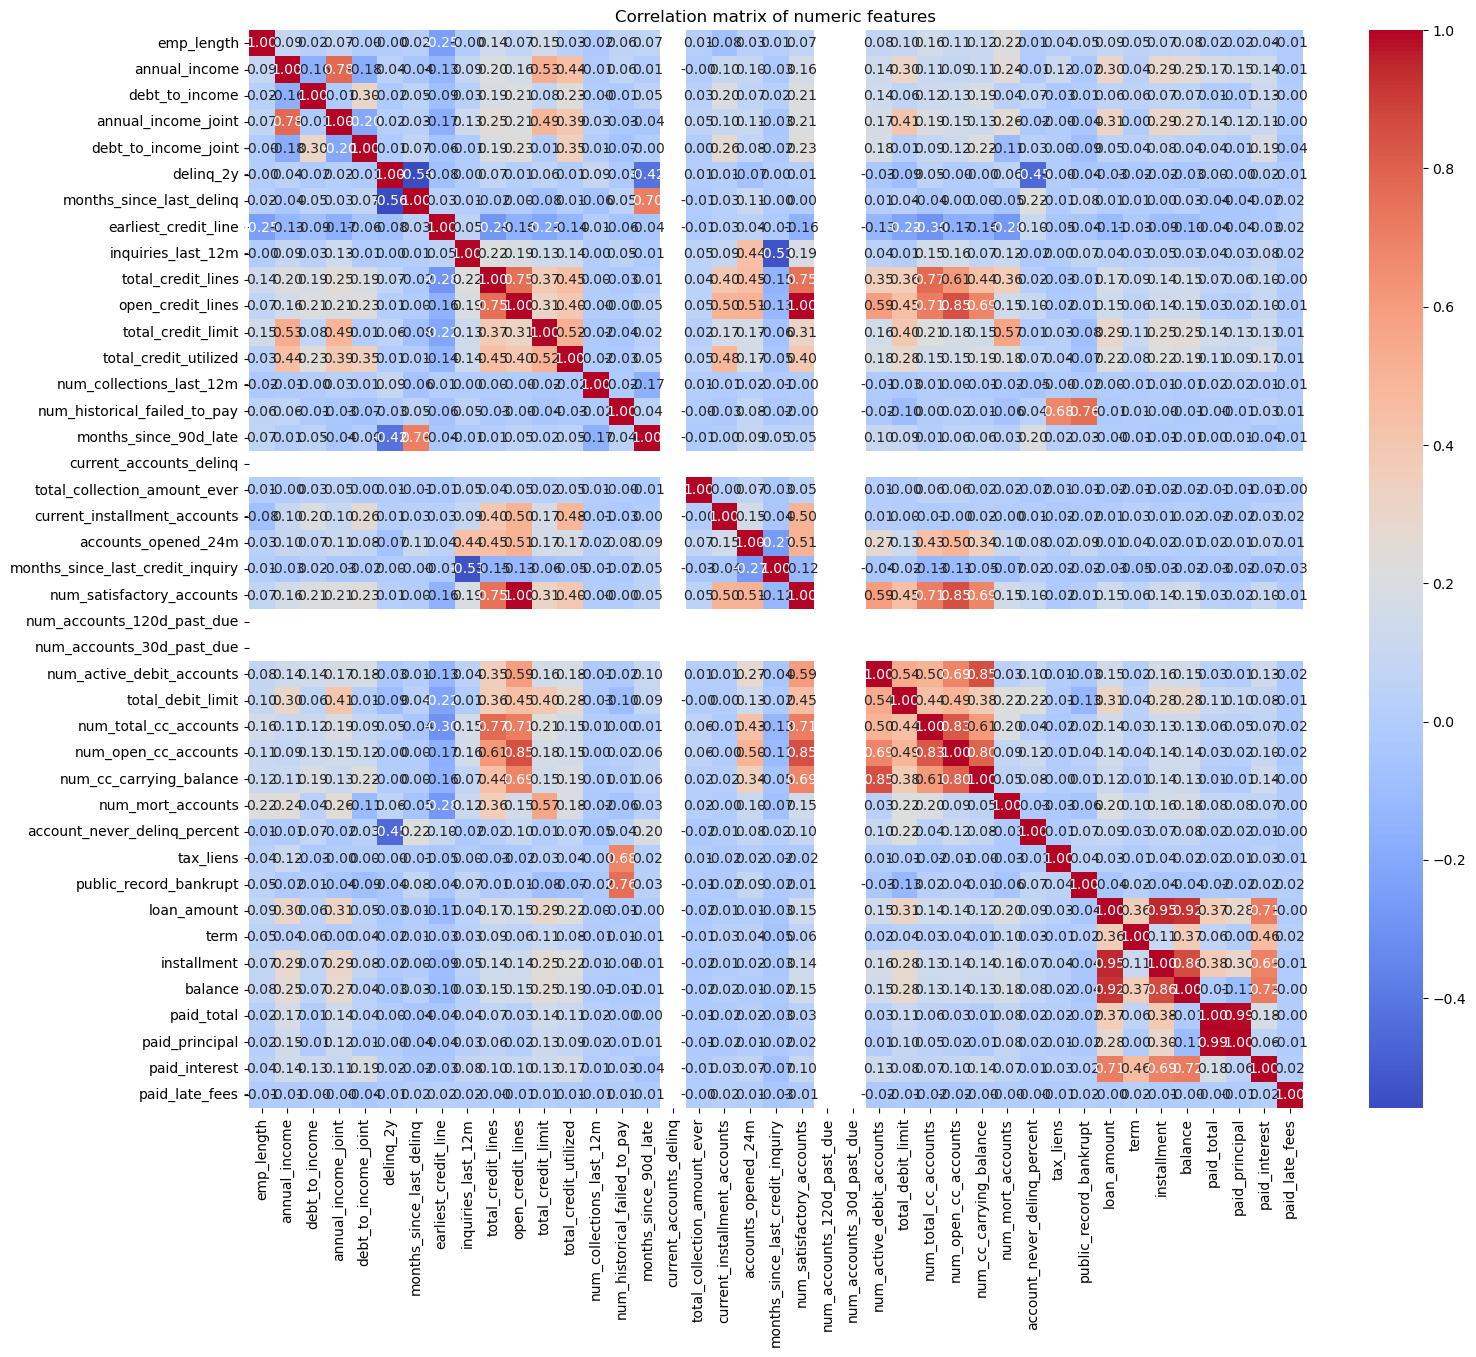

In [1253]:
# Creating a correlation matrix heatmap of the numeric features:
import seaborn as sns
numeric_columns_without_target = [col for col in numeric_columns if col != 'interest_rate']
correlation_matrix = df[numeric_columns_without_target].corr()
# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(17,14))
sns.heatmap(correlation_matrix, annot =True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation matrix of numeric features')
plt.show()

In [1254]:
# Missing Data
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing,percent_missing], axis =1, keys = ['Total','Percent'])
missing_data.head(10)

,Total,Percent
verification_income_joint,4305,0.8610
debt_to_income_joint,4283,0.8566
annual_income_joint,4283,0.8566
months_since_90d_late,3900,0.7800
months_since_last_delinq,2831,0.5662
months_since_last_credit_inquiry,641,0.1282
emp_title,420,0.0840
emp_length,412,0.0824
num_accounts_120d_past_due,157,0.0314
debt_to_income,12,0.0024


The columns 'verification_income_joint','months_since_90d_late','months_since_last_delinq' have null/missing values but since their correlation with the target variable 'interest rate' is low we won't be using them in the feature set for model creation and hence nothing needs to be done with them.

In [1256]:
# The 3 numeric columns that have missing/null values but have good correlation with the target variable 'interest rate' & hence need to be used in the feature set while model creation are 'debt_to_income_joint','annual_income_joint','debt_to_income'.
# Sine they have null/missing values we would consider filling in the missing values for these 3 numeric columns.
for i in ['debt_to_income_joint','annual_income_joint','debt_to_income']:
    df[i] = df[i].fillna(df[i].mean())
df['debt_to_income_joint']
df['annual_income_joint']
df['debt_to_income']

0        7.20
1       15.95
2        8.88
3       36.16
4       20.13
        ...  
4995    16.61
4996    25.88
4997    15.73
4998    21.12
4999     5.94
Name: debt_to_income, Length: 5000, dtype: float64

In [1257]:
# Checking for duplicate values
df[df.duplicated()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees


In [1258]:
# Filling in the null/missing values for some of the numeric columns that have nulls ( To be used later for creating a dataframe consisting only of numeric columns to be used for PCA)
for i in ['months_since_90d_late','months_since_last_delinq','months_since_last_credit_inquiry','emp_length','num_accounts_120d_past_due']:
    df[i] = df[i].fillna(df[i].mean())


In [1259]:
numeric_columns = df.select_dtypes(['int64','float']).columns
numeric_columns_df = df[numeric_columns]
numeric_columns_df.head(2)

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,5.904098,40000.0,7.20,125886.170209,20.321311,0,52.000000,1998,0,12,...,0,15000,60,17.47,376.59,14518.41,1115.21,481.59,633.62,0.0
1,2.000000,45000.0,15.95,125886.170209,20.321311,0,36.506224,2009,4,14,...,0,11200,36,12.62,375.33,10153.46,1469.92,1046.54,423.38,0.0


We see there are no duplicate values

Exploratory Data Analysis and Feature Selection

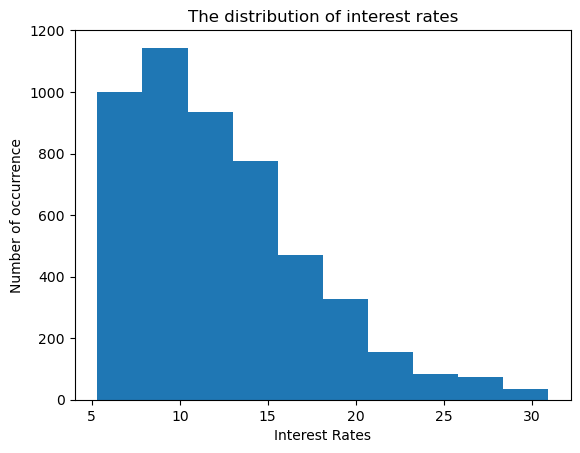

In [1262]:
plt.hist(df.interest_rate)
plt.title('The distribution of interest rates')
plt.xlabel('Interest Rates')
plt.ylabel('Number of occurrence')
plt.show()

We see that the distribution of Interest Rates is positively skewed.

Exploratory Data Analysis for the target variable and the categorical features/non-numeric features:

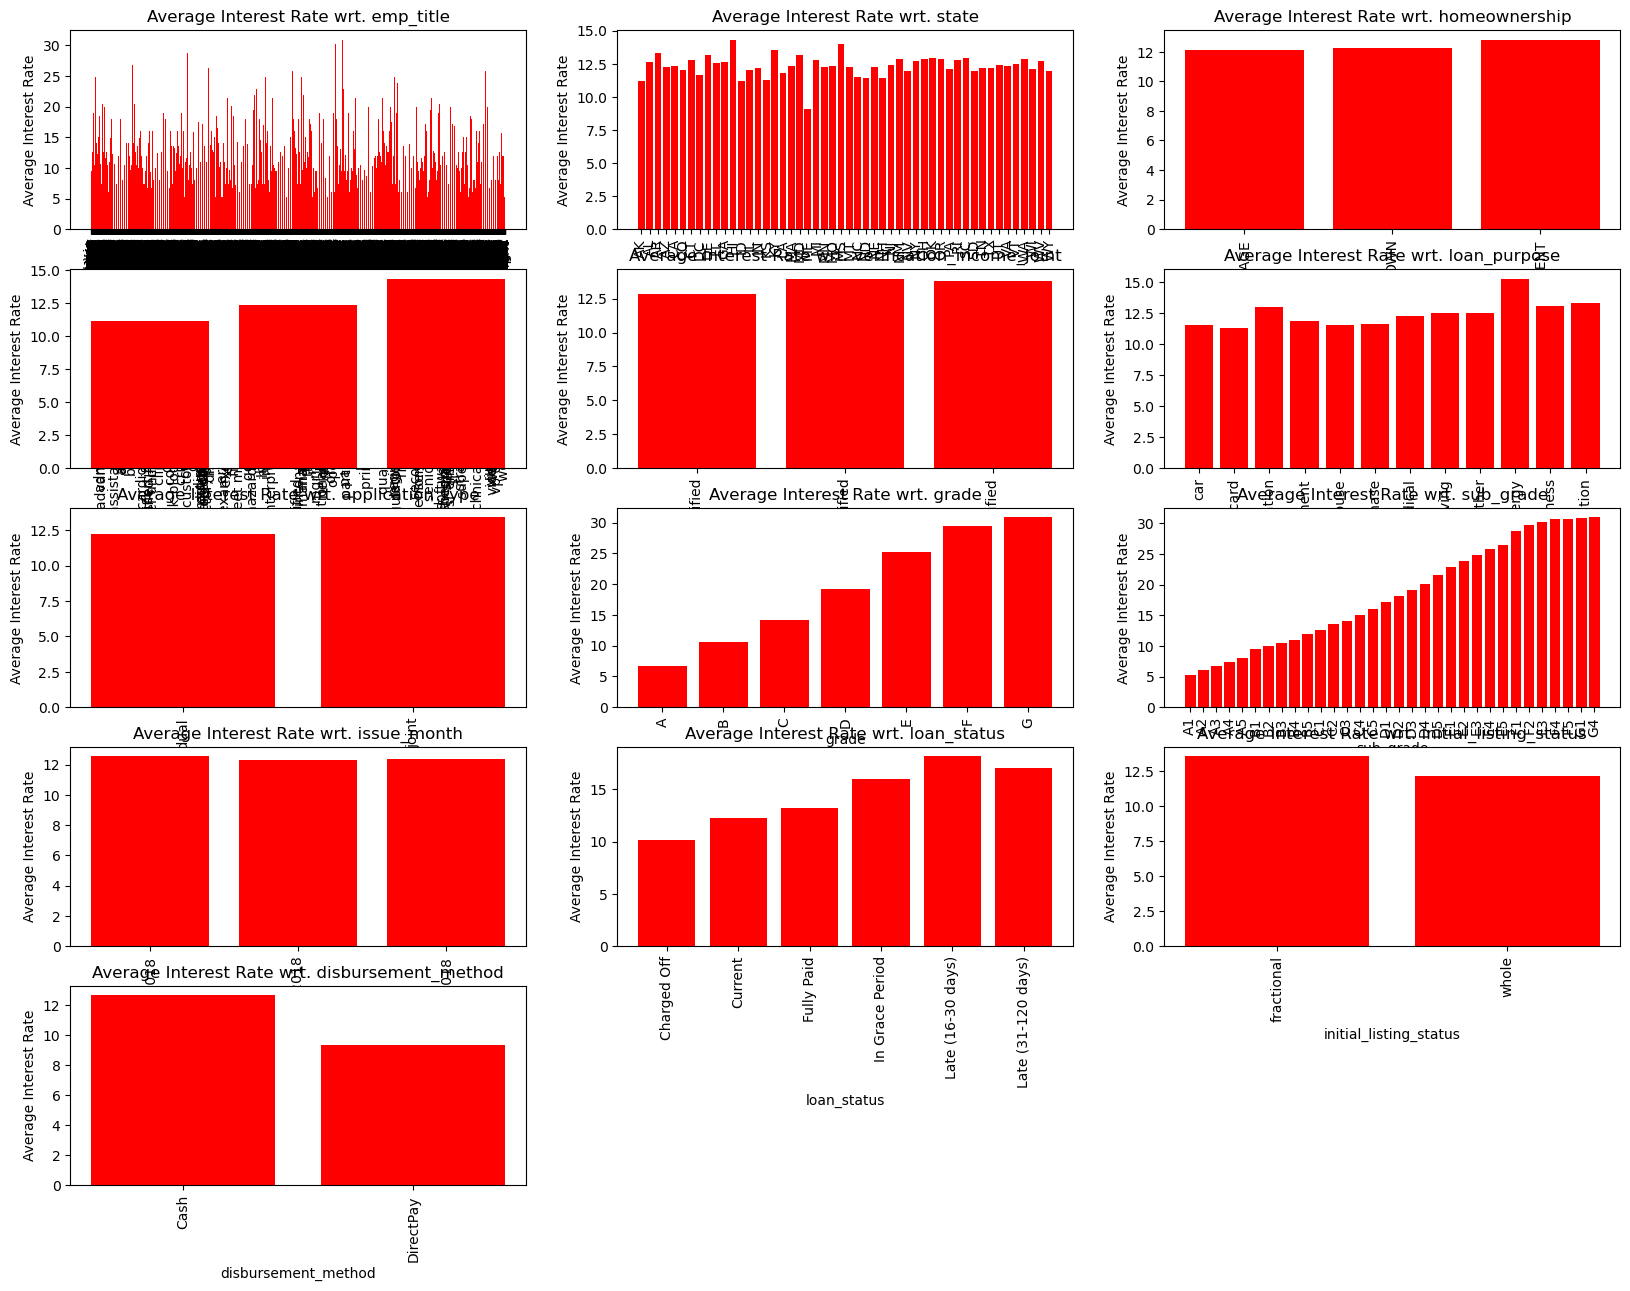

In [1265]:
# Plotting the 13 non-numeric features:
plt.figure(figsize=(20,15))
for index, column in enumerate(non_numeric_columns):
    plt.subplot(5,3,index+1)
    plt.bar(df.groupby(column)['interest_rate'].mean().index,
            df.groupby(column)['interest_rate'].mean(),color = 'red')
    plt.title('Average Interest Rate wrt. {}'.format(column))
    plt.ylabel('Average Interest Rate')
    plt.xlabel(column)
    plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()    

From the above plot visually it appears the top 2 non-numeric features most correlated with the target variable 'interest rate' are 'emp_title' & 'grade'.

In [1267]:
# For creating our model, we choose the top 6 numerical variables that are most correlated with the interest_rate. We also add 1  non-numeric feature that visually appear to be most correlated with interest_rate.
df = pd.concat([df,pd.get_dummies(df.grade,prefix ='grade',drop_first = True)],axis =1)
dummy_column_names = list(pd.get_dummies(df.grade,prefix = 'grade',drop_first = True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df.grade, prefix = 'grade',drop_first = True).columns)

In [1268]:
# Regression Model
# interest_rate is the target variable (The transformation using log is done to handle the skewed dataset)
Y = np.log1p(df['interest_rate'])
X = df[['paid_interest','term','debt_to_income_joint','total_debit_limit','annual_income_joint','debt_to_income'] +dummy_column_names]
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=465)
# This defines a list of alpha values to be used in regularization
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [1269]:
# Standardizing or normalizing the features:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression

In [1271]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)
print("R-squared of the model in training set is: {}".format(lrm.score(X_train,y_train)))
print("-----Test set statistics----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test,y_test)))
print("Mean absolute error of the prediction is : {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is : {}".format(mse(y_test,y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test,y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

R-squared of the model in training set is: 0.9440935267158604
-----Test set statistics----
R-squared of the model in test set is: 0.9380257307630633
Mean absolute error of the prediction is : 0.07097222802826425
Mean squared error of the prediction is : 0.008393996170953958
Root mean squared error of the prediction is: 0.09161875447174535
Mean absolute percentage error of the prediction is: 2.9806579609100416


Lasso Regression

In [1273]:
lasso_cv = LassoCV(alphas= alphas, cv =5)
lasso_cv.fit(X_train,y_train)
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)
print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model is : {}".format(lasso_cv.score(X_train,y_train)))
print("----Test set statistics----")
print("R-squared of the model in test set is : {}".format(lasso_cv.score(X_test,y_test)))
print(" Mean absolute error of the prediction is: {}".format(mse(y_test,y_preds_test)))
print("Root mean  squared error of the prediction is: {}".format(rmse(y_test,y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))
print("Mean squared error of the prediction is: {}".format(mse(y_test,y_preds_test)))

Best alpha value is: 0.0001
R-squared of the model is : 0.9440920425572156
----Test set statistics----
R-squared of the model in test set is : 0.9380485197279969
 Mean absolute error of the prediction is: 0.008390909559578812
Root mean  squared error of the prediction is: 0.09160190805643086
Mean absolute percentage error of the prediction is: 2.979601375278406
Mean squared error of the prediction is: 0.008390909559578812


Ridge Regression

In [1275]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train,y_train)
# We are making predictions
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)
print("Best alpha value is : {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is : {}".format(ridge_cv.score(X_train,y_train)))
print("----Test set statistics----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test,y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test,y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test,y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

Best alpha value is : 1e-10
R-squared of the model in training set is : 0.9440935267158604
----Test set statistics----
R-squared of the model in test set is: 0.9380257307630638
Mean absolute error of the prediction is: 0.07097222802826363
Mean squared error of the prediction is: 0.00839399617095387
Root mean squared error of the prediction is: 0.09161875447174486
Mean absolute percentage error of the prediction is: 2.980657960910015


Elastic Net Regression

In [1277]:
elasticnet_cv = ElasticNetCV(alphas = alphas, cv =5)
elasticnet_cv.fit(X_train,y_train)
# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)
print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-sqaured of the model in training set is: {}".format(elasticnet_cv.score(X_train,y_train)))
print("---Test set statistics---")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test,y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test,y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test,y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test-y_preds_test)/y_test))*100))

Best alpha value is: 0.001
R-sqaured of the model in training set is: 0.9440518071264021
---Test set statistics---
R-squared of the model in test set is: 0.9380742997556936
Mean absolute error of the prediction is: 0.07090228612888498
Mean squared error of the prediction is: 0.008387417828955154
Root mean squared error of the prediction is: 0.0915828468052569
Mean absolute percentage error of the prediction is: 2.9776161236058503


Random Forest Regression

In [1279]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initializing the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Training the model
rf_regressor.fit(X_train, y_train)
# Making predictions on the test set
y_preds_test = rf_regressor.predict(X_test)
# Evaluating the model
mse = mean_squared_error(y_test, y_preds_test)
r2 = r2_score(y_test, y_preds_test)
mae = mean_absolute_error(y_test, y_preds_test)
# Calculating RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_preds_test))
# Calculating MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

print("R-squared of the model in training set is:", rf_regressor.score(X_train, y_train))
print("R-squared of the model in test set is:", rf_regressor.score(X_test, y_test))
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

R-squared of the model in training set is: 0.9912213196716904
R-squared of the model in test set is: 0.9338006899970114
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.07
Root Mean Squared Error (RMSE): 0.09
Mean Absolute Percentage Error (MAPE): 3.09%


Model Performance Comparison

In [1359]:
from astropy.table import Table

data_row = [('Linear Regression',0.9440935, 0.938025, 0.07097, 0.008393, 0.09161, 2.98065),
            ('Lasso Regression', 0.94409204, 0.938048, 0.008390, 0.008390, 0.091601, 2.9796),
            ('Ridge Regression', 0.9440935267, 0.9380257, 0.070972, 0.008393, 0.091618, 2.980657),
            ('Elastic Net Regression', 0.9440518, 0.938074, 0.0709022, 0.008387, 0.09158, 2.97761),
            ('Random Forest Regression', 0.9912213, 0.9338006, 0.07, 0.01, 0.09, 3.09)]

t = Table(rows=data_row, names=('Model', 'R-Sq. Training', 'R-Sq. Test', 'MAE', 'MSE', 'RMSE', 'MAPE'))
print(t)

         Model           R-Sq. Training R-Sq. Test    MAE      MSE      RMSE     MAPE  
------------------------ -------------- ---------- --------- -------- -------- --------
       Linear Regression      0.9440935   0.938025   0.07097 0.008393  0.09161  2.98065
        Lasso Regression     0.94409204   0.938048   0.00839  0.00839 0.091601   2.9796
        Ridge Regression   0.9440935267  0.9380257  0.070972 0.008393 0.091618 2.980657
  Elastic Net Regression      0.9440518   0.938074 0.0709022 0.008387  0.09158  2.97761
Random Forest Regression      0.9912213  0.9338006      0.07     0.01     0.09     3.09


Best Model for predicting the interest rate based on the different features:
It was a tough choice selecting the best model, especially between Lasso and Elastic Net Regression but overall I feel Elastic Net Regression is the best model we can select for predicting the loan interest rate based on the different features since R-squared Test for Elastic Net Regression is slightly higher than Lasso and the errors are more or less the same (MAE for Lasso is although slightly lower than Elastic Regression).

Seggregating the loan customers based on similar characteristics using the clustering techniques:

In [1284]:
# Loading some more libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

In [1285]:
# Scaling the DataFrame
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_columns_df)

In [1286]:
# Applying Dimensionality Reduction Technique: PCA
# Getting the first 2 Principal Components
pca = PCA(n_components=2)
# Getting the components by calling the 'fit_transform()' method with the data
pca_components = pca.fit_transform(scaled_df)

In [1287]:
pca_df = pd.DataFrame(data= pca_components, columns =['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-2.477928,1.271729
1,-2.477641,0.100132
2,0.031351,0.776992
3,3.351476,-0.269392
4,-2.713106,-0.251032
...,...,...
4995,-0.560630,-1.044530
4996,-1.426232,0.156813
4997,3.288086,-2.561907
4998,1.451770,-1.756297


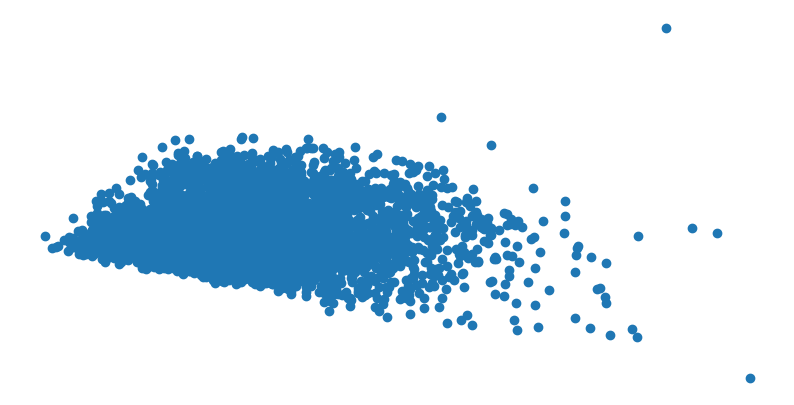

In [1288]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

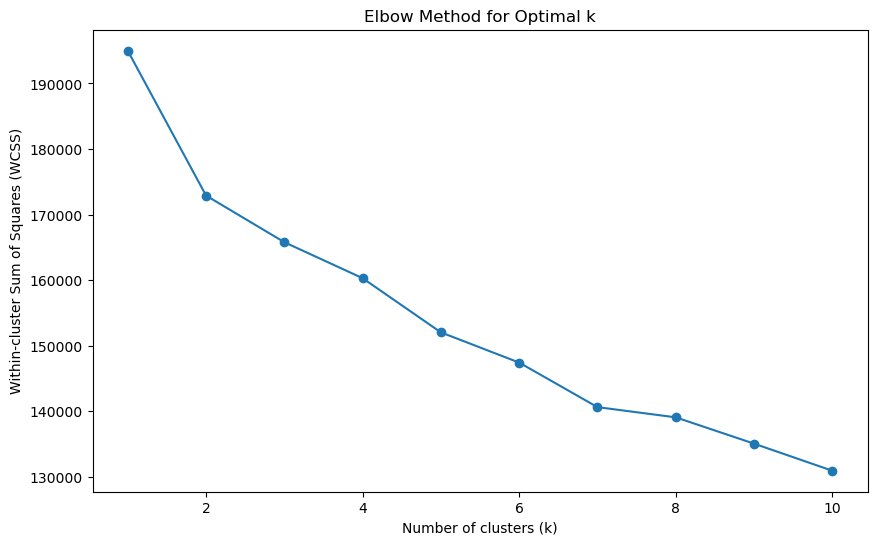

In [1294]:
# Hyperparameter tuning
# Finding 'K' value by Elbow Method

# Initializing an empty list to store the WCSS values
wcss = []
# Computing WCSS for different values of K
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
# Plot the WCSS values to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.show()

In [1295]:
# Model Building using K-Means
kmeans_cluster = KMeans(n_clusters=4, random_state=123)
labels= kmeans_cluster.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_cluster.labels_})],axis=1)

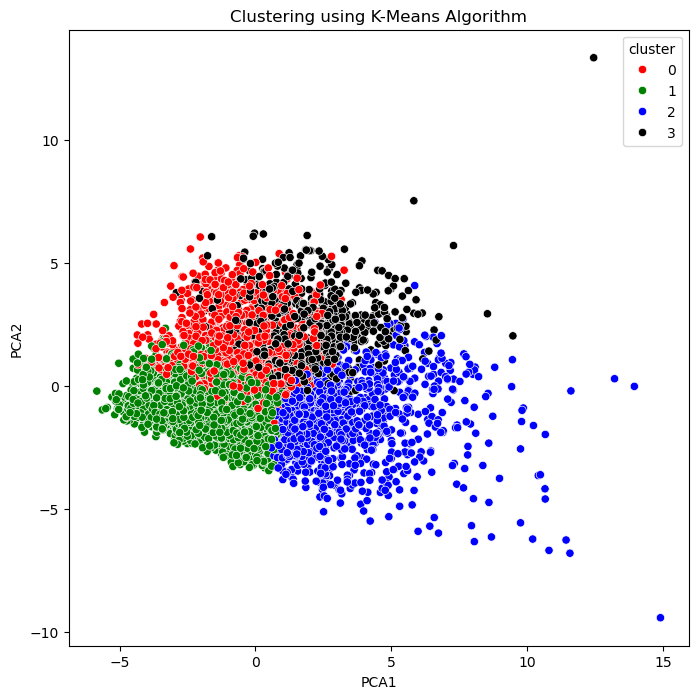

In [1296]:
# Visualizing the clustered dataframe
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = 'PCA1',y='PCA2',hue='cluster',data = pca_df_kmeans,palette=['red','green','blue','black'])
# Setting the limits for the x-axis and y-axis to start from 0
plt.title('Clustering using K-Means Algorithm')
plt.show()

In [1297]:
print(metrics.silhouette_score(scaled_df, labels, metric='euclidean'))

0.08480966741728543


In [1298]:
# Finding the cluster centers
cluster_centers = pd.DataFrame(data=kmeans_cluster.cluster_centers_, columns=[numeric_columns_df.columns])

In [1299]:
# Inverse transforming the data
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[numeric_columns_df.columns])
cluster_centers

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,5.887903,72298.610747,19.350852,121573.166851,20.474614,0.157796,37.091499,2002.463119,2.014939,18.278245,...,0.176471,22761.041083,53.210084,16.172717,628.709216,21376.820383,2448.593160,1384.220700,1064.165546,2.069188e-01
1,5.435092,60842.967531,17.082419,123600.058038,20.151666,0.243433,36.137518,2002.669440,1.582750,17.811296,...,0.113835,9036.569615,37.723292,11.222461,285.827828,7844.140425,1455.383323,1178.418682,276.884772,7.986865e-02
2,6.415577,90038.258820,24.616215,127385.140436,20.598228,0.251844,37.005855,1998.915701,2.845100,36.753425,...,0.125395,16735.432034,43.763962,12.227492,485.748967,15209.761507,2129.578992,1522.509305,606.971401,9.828240e-02
3,6.770705,142576.627859,19.636825,137981.262236,20.264539,0.196839,36.134306,1998.043103,2.073276,26.964080,...,0.053161,29970.761494,43.275862,10.756221,874.790402,24172.733822,6623.909328,5749.896365,874.012945,-5.551115e-17


In [1300]:
# Creating a target column 'Cluster' for storing the cluster segment
cluster_df = pd.concat([numeric_columns_df,pd.DataFrame({'Cluster':kmeans_cluster.labels_})],axis=1)
cluster_df

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Cluster
0,5.904098,40000.0,7.20,125886.170209,20.321311,0,52.000000,1998,0,12,...,15000,60,17.47,376.59,14518.41,1115.21,481.59,633.62,0.0,0
1,2.000000,45000.0,15.95,125886.170209,20.321311,0,36.506224,2009,4,14,...,11200,36,12.62,375.33,10153.46,1469.92,1046.54,423.38,0.0,1
2,10.000000,53000.0,8.88,125886.170209,20.321311,1,21.000000,1989,0,20,...,20000,60,16.02,486.58,19103.93,1928.52,896.07,1032.45,0.0,0
3,10.000000,90000.0,36.16,125886.170209,20.321311,0,44.000000,2002,0,46,...,21000,60,10.42,450.55,19635.51,2240.59,1364.49,876.10,0.0,2
4,10.000000,48000.0,20.13,125886.170209,20.321311,0,36.506224,1998,0,15,...,10000,36,6.08,304.59,8976.56,1214.98,1023.44,191.54,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10.000000,50000.0,16.61,91000.000000,10.060000,0,51.000000,1997,0,28,...,13000,36,9.44,416.07,11406.10,2042.85,1593.90,448.95,0.0,1
4996,5.904098,30000.0,25.88,125886.170209,20.321311,0,36.506224,1996,0,25,...,15000,60,9.92,318.12,14412.81,937.83,587.19,350.64,0.0,1
4997,10.000000,74000.0,15.73,125886.170209,20.321311,1,21.000000,2007,7,45,...,11000,36,14.08,376.39,9993.15,1504.79,1006.85,497.94,0.0,2
4998,0.000000,37500.0,21.12,125886.170209,20.321311,0,36.506224,2007,1,56,...,12975,36,15.05,450.11,12102.00,1339.48,873.00,466.48,0.0,2


In [1301]:
cluster_1_df = cluster_df[cluster_df['Cluster']==0]
cluster_1_df

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Cluster
0,5.904098,40000.0,7.20,125886.170209,20.321311,0,52.000000,1998,0,12,...,15000,60,17.47,376.59,14518.41,1115.21,481.59,633.62,0.0,0
2,10.000000,53000.0,8.88,125886.170209,20.321311,1,21.000000,1989,0,20,...,20000,60,16.02,486.58,19103.93,1928.52,896.07,1032.45,0.0,0
13,4.000000,105000.0,13.77,125886.170209,20.321311,0,50.000000,2006,2,20,...,16000,60,11.98,355.75,15406.06,1045.95,593.94,452.01,0.0,0
26,10.000000,75000.0,30.69,125886.170209,20.321311,0,37.000000,2004,2,25,...,28000,36,17.09,999.54,25545.08,3971.58,2454.92,1516.66,0.0,0
27,7.000000,62000.0,17.44,125886.170209,20.321311,0,36.506224,2008,0,10,...,20000,36,11.99,664.20,18592.93,2072.54,1407.07,665.47,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,0.000000,100000.0,10.31,125886.170209,20.321311,0,42.000000,2002,0,14,...,40000,60,12.61,902.16,39031.28,1860.37,968.72,891.65,0.0,0
4985,2.000000,120000.0,7.73,125886.170209,20.321311,0,36.506224,1995,4,9,...,35000,36,14.08,1197.58,30972.01,5960.52,4027.99,1932.53,0.0,0
4988,3.000000,21000.0,17.43,125886.170209,20.321311,0,36.506224,2002,0,3,...,20000,60,15.05,476.33,18844.17,2348.21,1155.83,1192.38,0.0,0
4990,9.000000,29415.0,9.96,125886.170209,20.321311,0,36.506224,2004,0,12,...,10275,60,25.81,306.49,9934.26,979.74,340.74,639.00,0.0,0


In [1302]:
cluster_2_df = cluster_df[cluster_df['Cluster']==1]
cluster_2_df

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Cluster
1,2.000000,45000.0,15.95,125886.170209,20.321311,0,36.506224,2009,4,14,...,11200,36,12.62,375.33,10153.46,1469.92,1046.54,423.38,0.0,1
4,10.000000,48000.0,20.13,125886.170209,20.321311,0,36.506224,1998,0,15,...,10000,36,6.08,304.59,8976.56,1214.98,1023.44,191.54,0.0,1
5,5.904098,53232.0,6.33,125886.170209,20.321311,0,36.506224,2007,1,11,...,6000,36,17.47,215.33,5742.17,462.70,257.83,204.87,0.0,1
6,4.000000,69000.0,28.74,125886.170209,20.321311,0,36.506224,1994,2,27,...,12000,36,7.35,372.45,10793.17,1484.90,1206.83,278.07,0.0,1
7,4.000000,28000.0,65.20,60000.000000,32.920000,0,36.506224,2006,8,18,...,10000,36,14.07,342.12,9317.45,1018.54,682.55,335.99,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,10.000000,100000.0,12.60,125886.170209,20.321311,0,36.506224,2003,0,25,...,8000,36,6.08,243.67,6973.97,1215.65,1026.03,189.62,0.0,1
4991,3.000000,95000.0,10.38,125886.170209,20.321311,0,36.506224,2005,1,11,...,10000,36,5.32,301.15,6247.34,3901.64,3752.66,148.98,0.0,1
4995,10.000000,50000.0,16.61,91000.000000,10.060000,0,51.000000,1997,0,28,...,13000,36,9.44,416.07,11406.10,2042.85,1593.90,448.95,0.0,1
4996,5.904098,30000.0,25.88,125886.170209,20.321311,0,36.506224,1996,0,25,...,15000,60,9.92,318.12,14412.81,937.83,587.19,350.64,0.0,1


In [1303]:
cluster_3_df = cluster_df[cluster_df['Cluster']==2]
cluster_3_df

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Cluster
3,10.000000,90000.0,36.16,125886.170209,20.321311,0,44.000000,2002,0,46,...,21000,60,10.42,450.55,19635.51,2240.59,1364.49,876.10,0.0,2
11,10.000000,65500.0,18.71,125886.170209,20.321311,0,36.506224,2006,5,27,...,16000,36,12.62,536.18,14121.33,2669.68,1878.67,791.01,0.0,2
19,10.000000,74000.0,22.65,125886.170209,20.321311,0,36.506224,2003,9,37,...,19600,60,10.42,420.51,18585.61,1630.99,1014.39,616.60,0.0,2
20,10.000000,105000.0,26.62,125886.170209,20.321311,0,36.506224,2001,2,21,...,10000,36,20.39,373.63,9378.42,1109.56,621.58,487.98,0.0,2
24,2.000000,40000.0,19.02,125886.170209,20.321311,1,14.000000,2007,20,36,...,6300,36,13.59,214.07,5866.97,637.45,433.03,204.42,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,10.000000,80000.0,13.95,125886.170209,20.321311,0,36.506224,2002,6,47,...,10000,36,7.97,313.23,2786.87,7435.26,7213.13,222.13,0.0,2
4987,5.904098,110000.0,19.40,125886.170209,20.321311,1,16.000000,2002,3,49,...,8000,36,9.93,257.88,7025.61,1284.99,974.39,310.60,0.0,2
4994,10.000000,54000.0,16.87,125886.170209,20.321311,0,49.000000,2006,3,26,...,20000,60,17.09,498.02,18903.27,2442.63,1096.73,1345.90,0.0,2
4997,10.000000,74000.0,15.73,125886.170209,20.321311,1,21.000000,2007,7,45,...,11000,36,14.08,376.39,9993.15,1504.79,1006.85,497.94,0.0,2


In [1304]:
cluster_4_df = cluster_df[cluster_df['Cluster']==3]
cluster_4_df

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Cluster
10,10.0,140000.0,23.01,125886.170209,20.321311,0,36.506224,1989,0,25,...,28675,36,10.90,937.43,27314.92,1857.500000,1360.08,497.42,0.0,3
14,10.0,143000.0,29.31,125886.170209,20.321311,0,36.506224,1998,3,28,...,20000,36,10.42,649.30,0.00,1918.960000,1439.33,479.63,0.0,3
23,2.0,35000.0,14.37,164000.000000,10.520000,0,36.506224,2007,0,18,...,27000,60,11.99,600.47,0.00,27011.695250,27000.00,11.70,0.0,3
25,6.0,175500.0,9.44,125886.170209,20.321311,0,57.000000,2000,1,26,...,20000,36,6.72,614.99,17456.72,3060.020000,2543.28,516.74,0.0,3
31,10.0,135400.0,17.89,125886.170209,20.321311,0,36.506224,1996,0,30,...,35000,60,10.90,759.25,34113.32,1497.310000,886.68,610.63,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,10.0,137000.0,9.63,125886.170209,20.321311,0,43.000000,1998,4,28,...,33000,60,9.93,700.02,31270.90,2781.880000,1729.10,1052.78,0.0,3
4976,4.0,81000.0,16.13,125886.170209,20.321311,0,36.506224,2005,4,32,...,35000,36,9.44,1120.18,31580.53,4462.360000,3419.47,1042.89,0.0,3
4979,10.0,92000.0,18.22,125886.170209,20.321311,0,36.506224,1997,0,23,...,25000,36,9.44,800.13,22557.51,3200.530000,2442.49,758.04,0.0,3
4983,5.0,80000.0,15.38,125886.170209,20.321311,0,36.506224,1995,2,31,...,40000,36,7.97,1252.91,36011.51,4993.930000,3988.49,1005.44,0.0,3


<Axes: xlabel='Cluster', ylabel='count'>

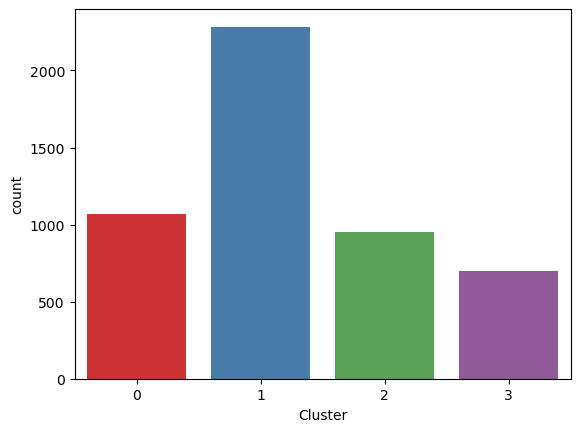

In [1305]:
# Visualization
sns.countplot(x='Cluster', data = cluster_df, palette='Set1')

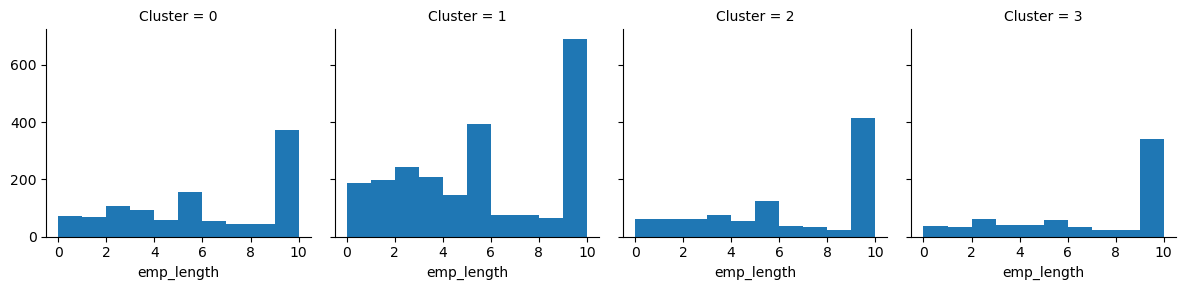

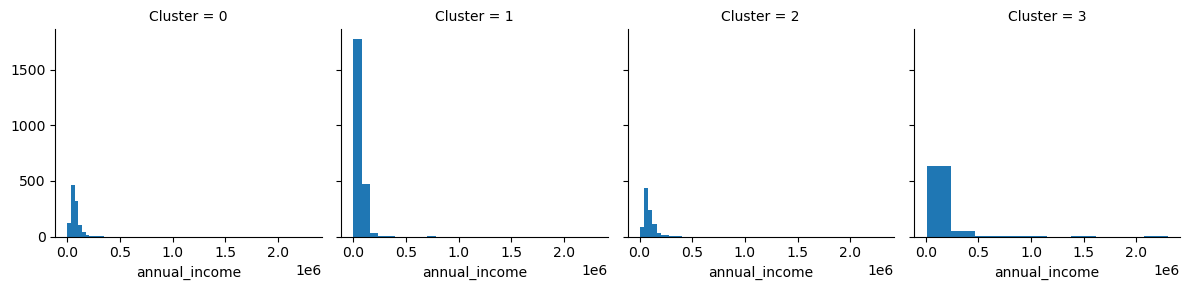

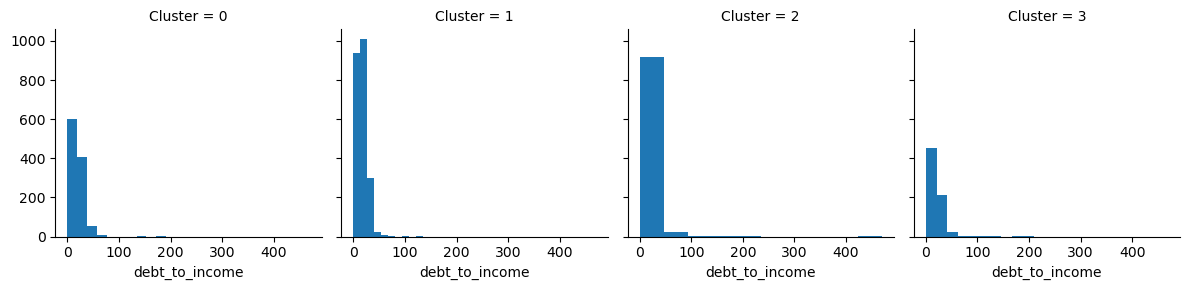

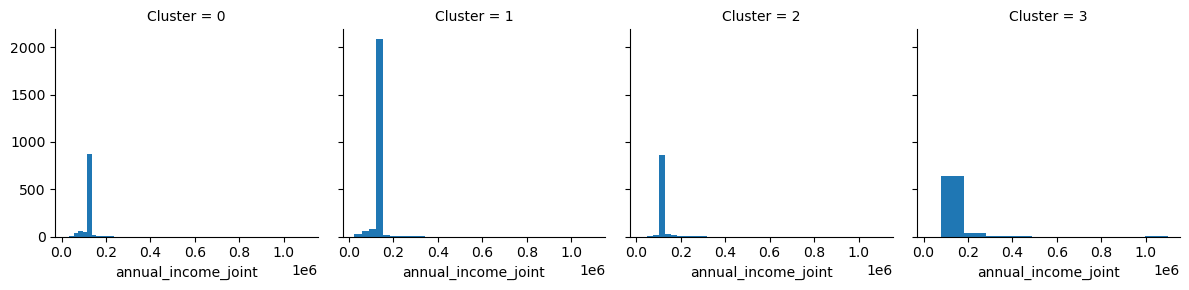

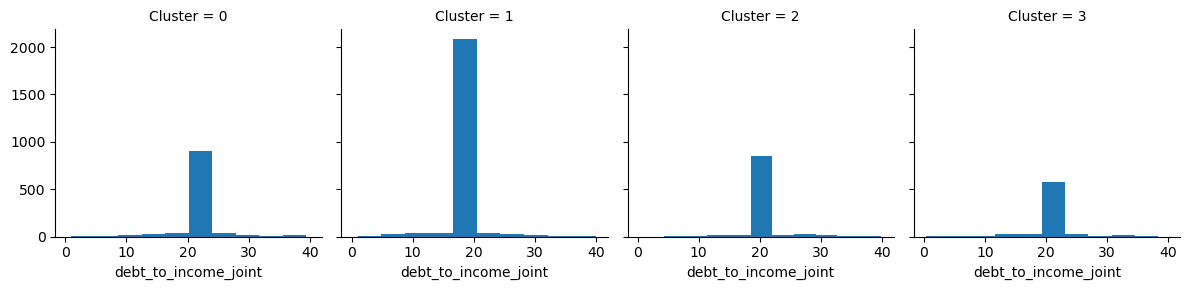

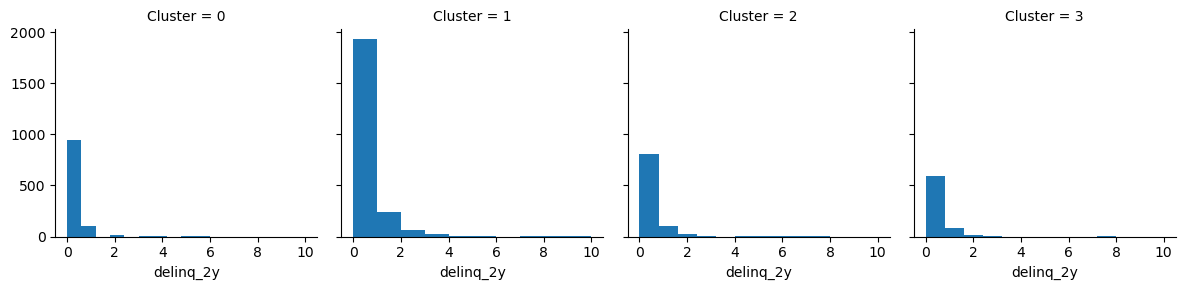

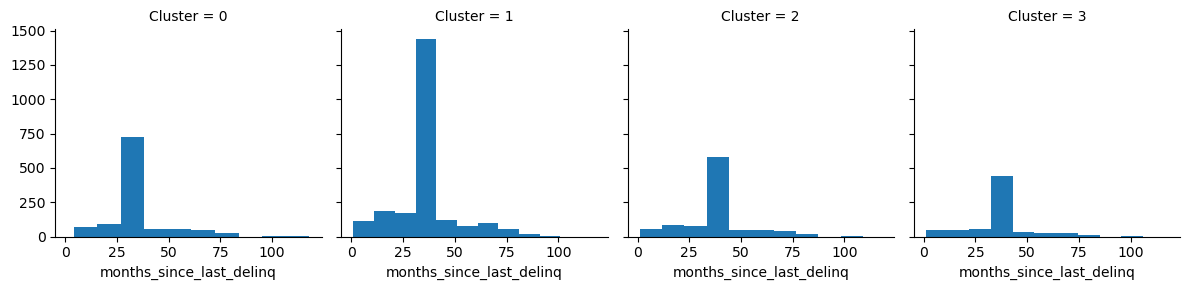

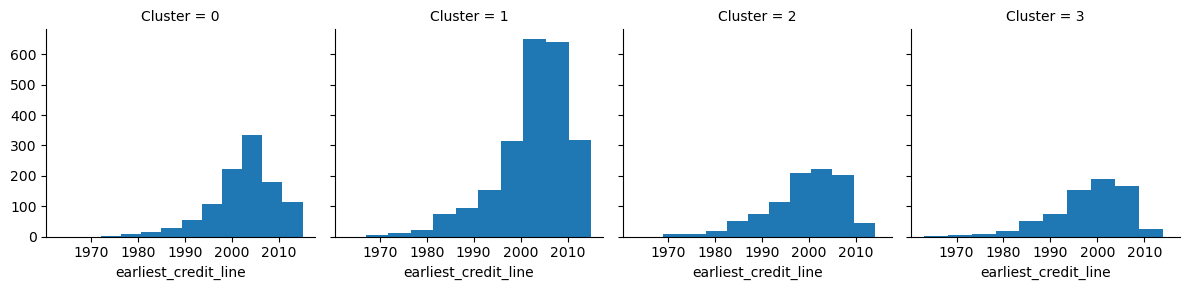

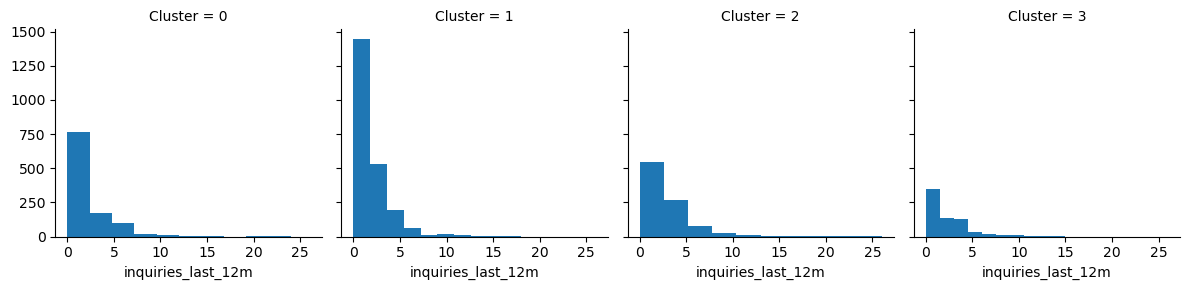

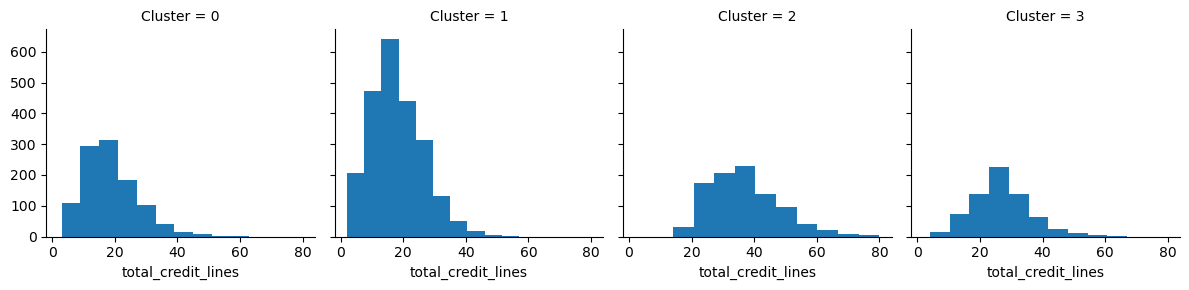

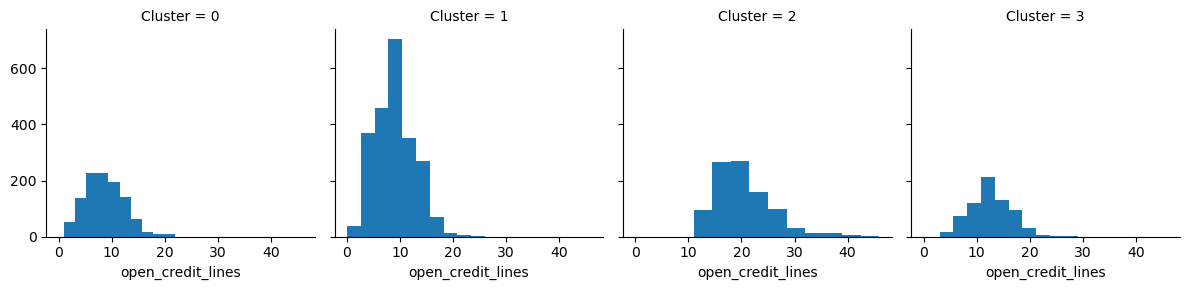

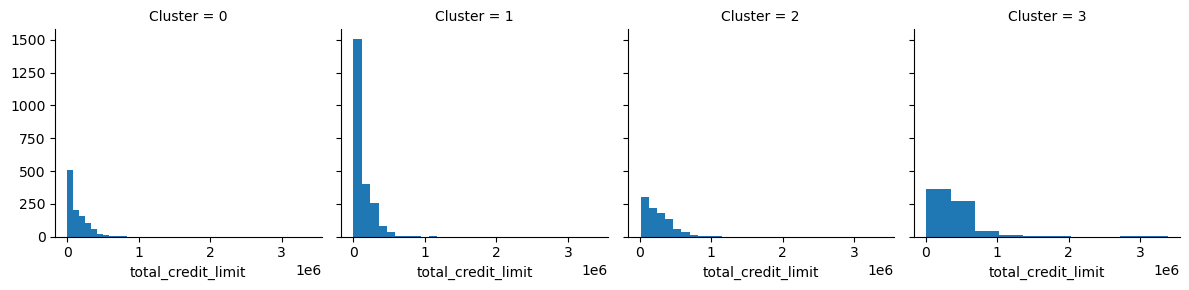

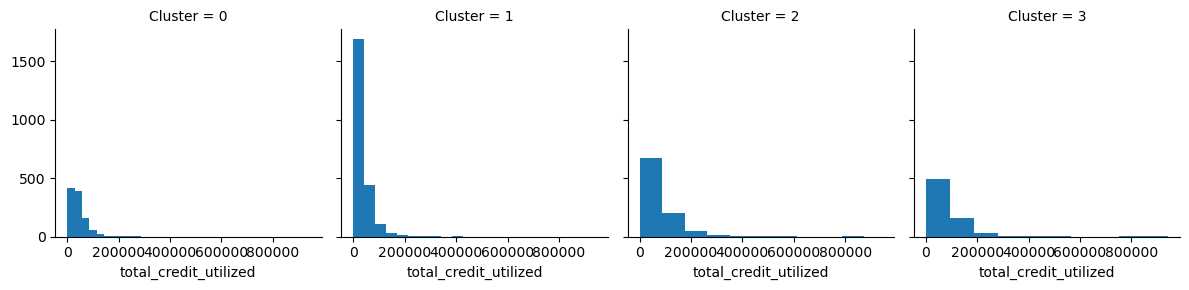

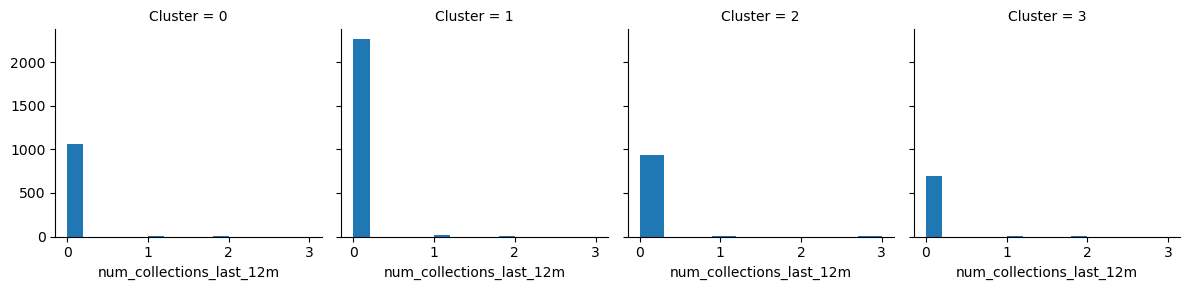

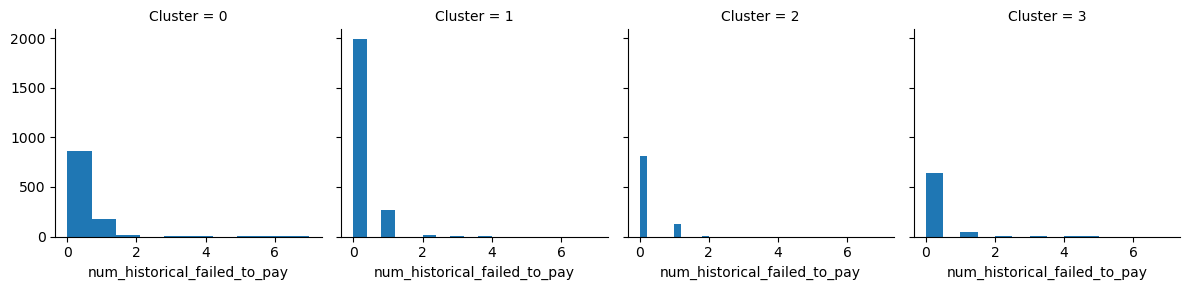

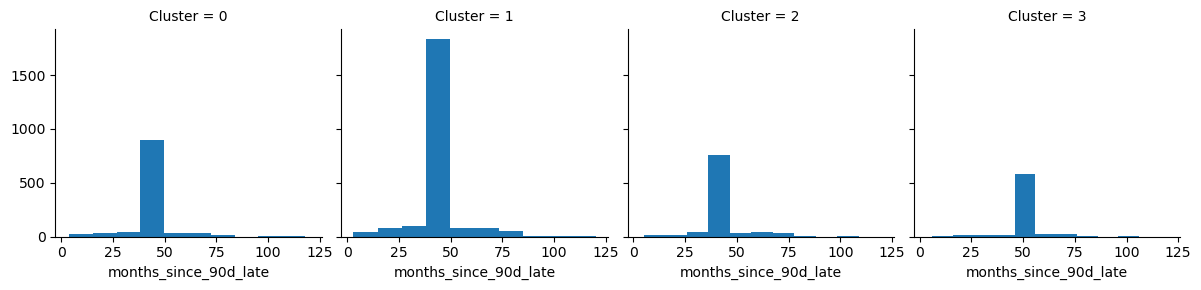

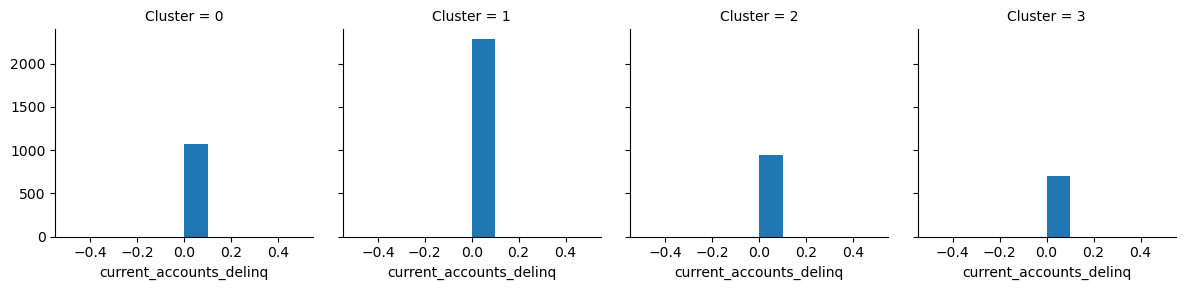

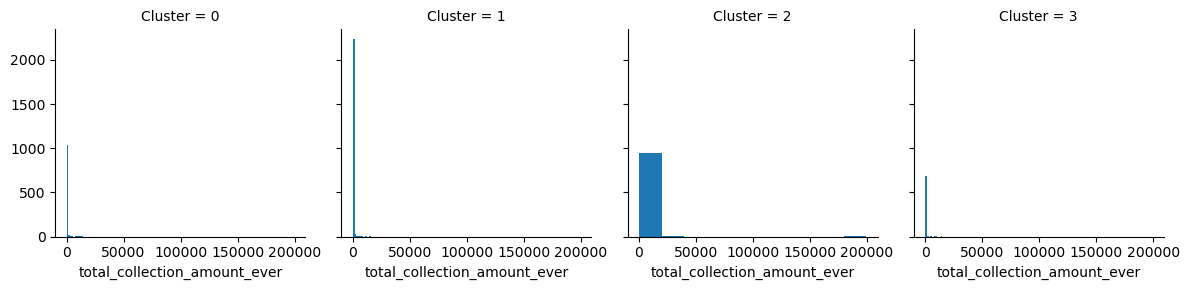

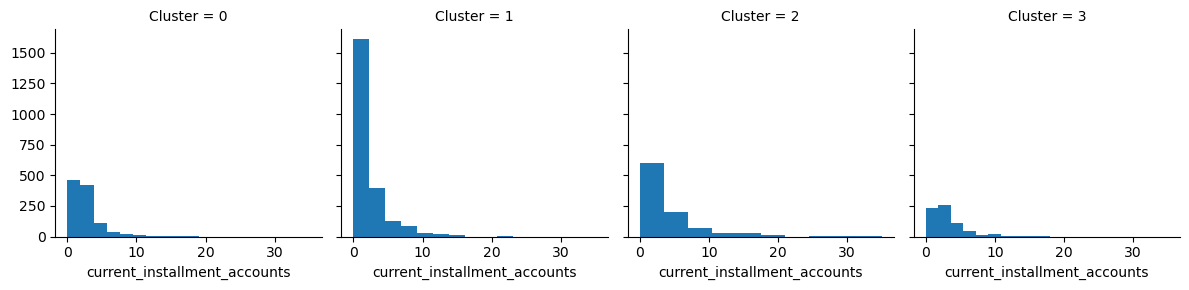

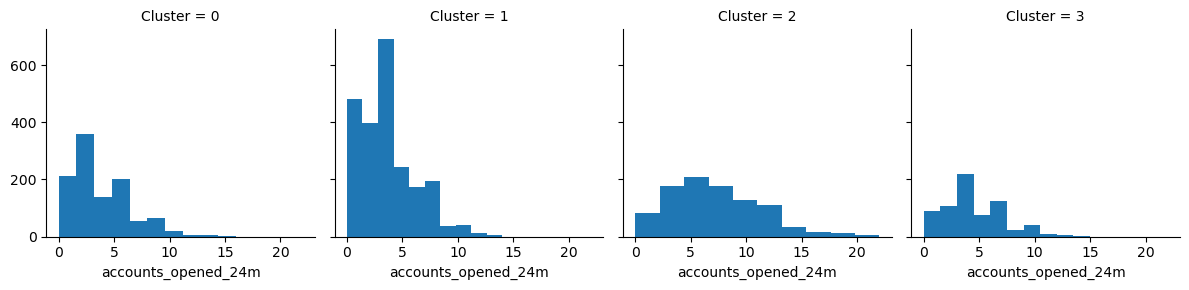

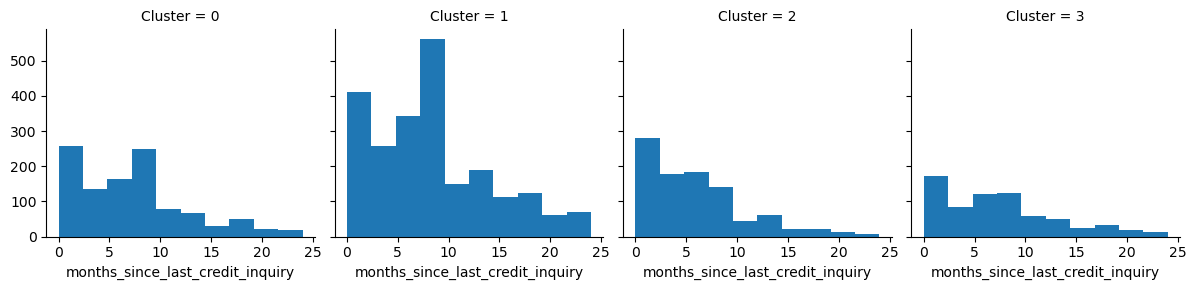

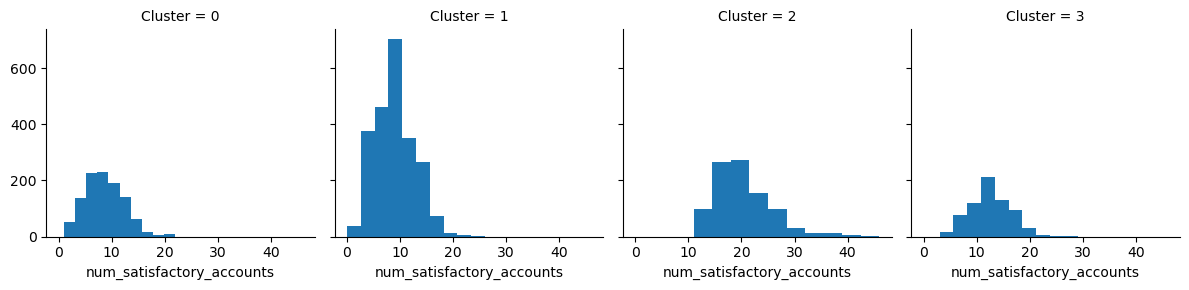

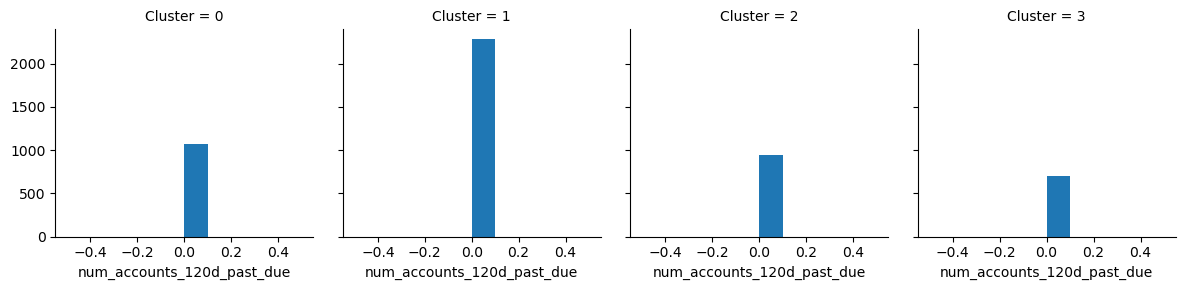

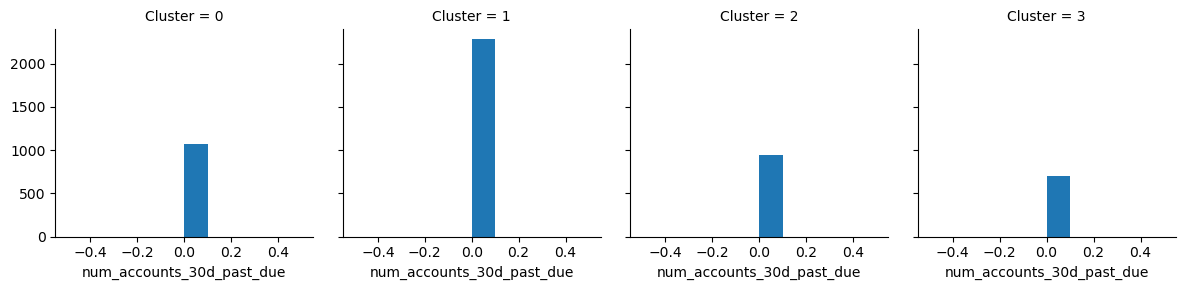

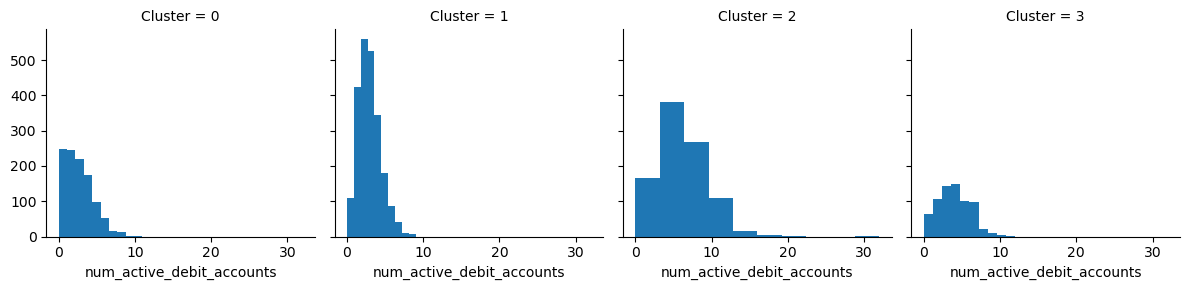

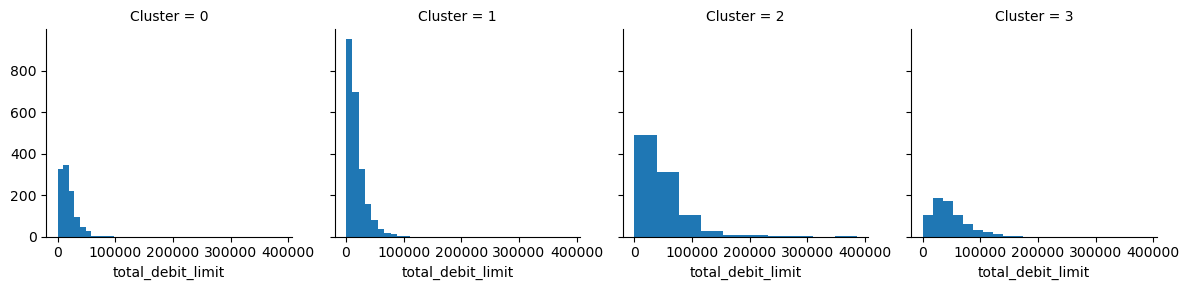

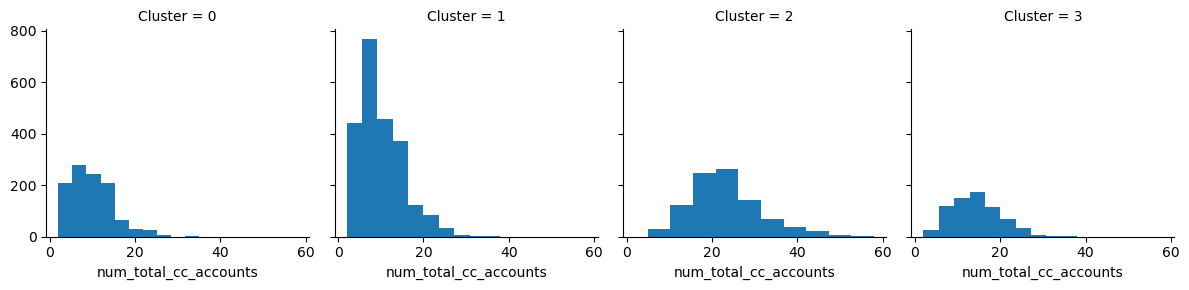

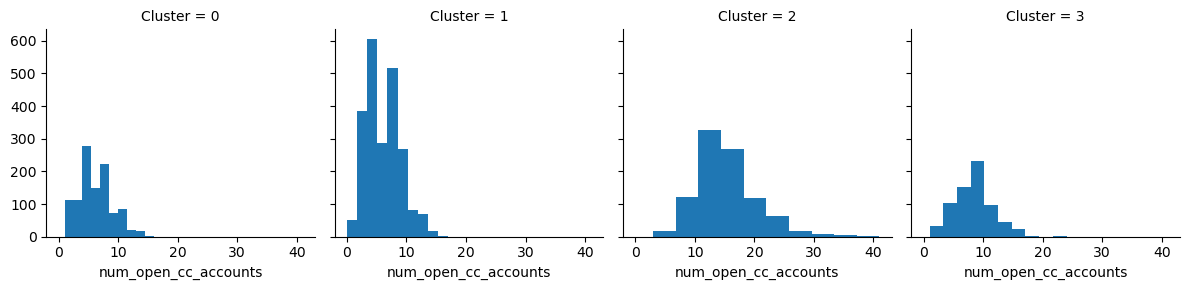

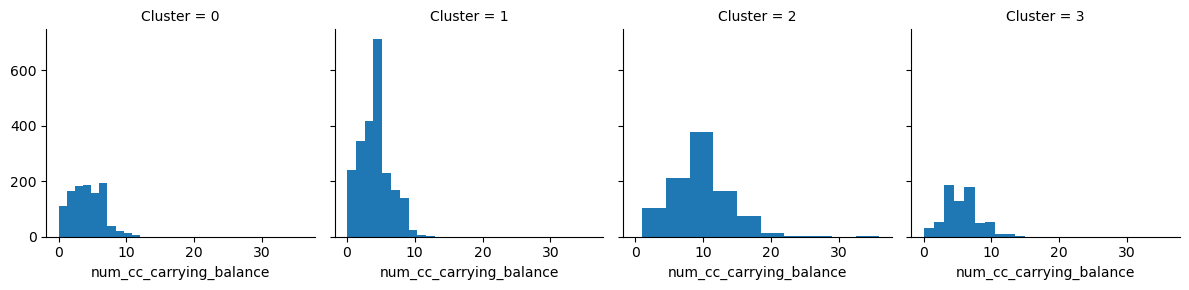

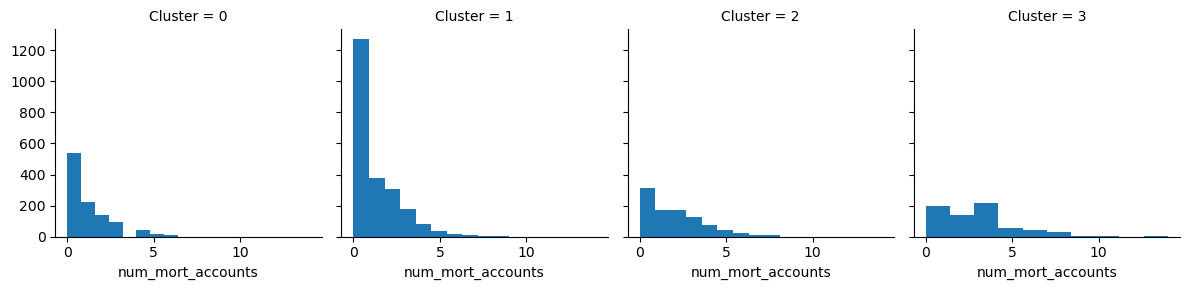

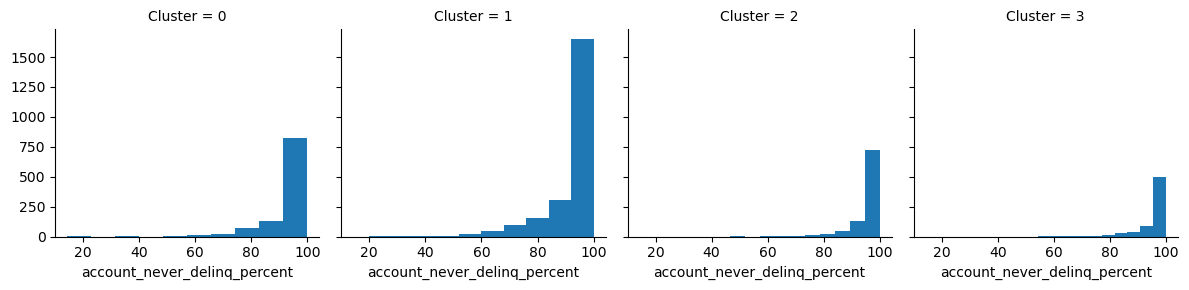

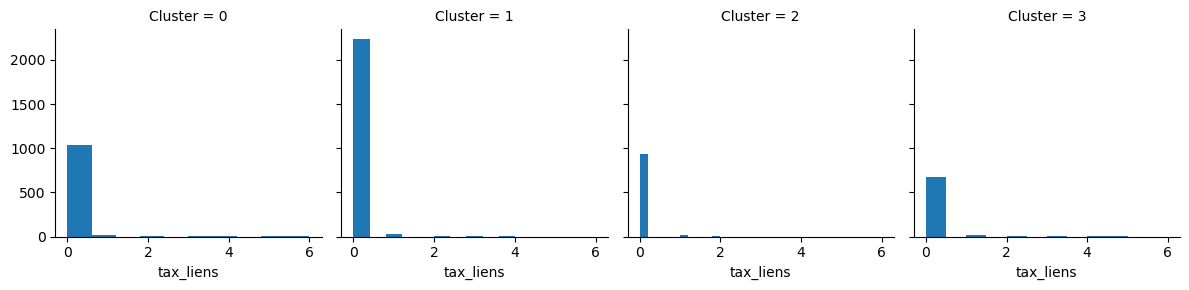

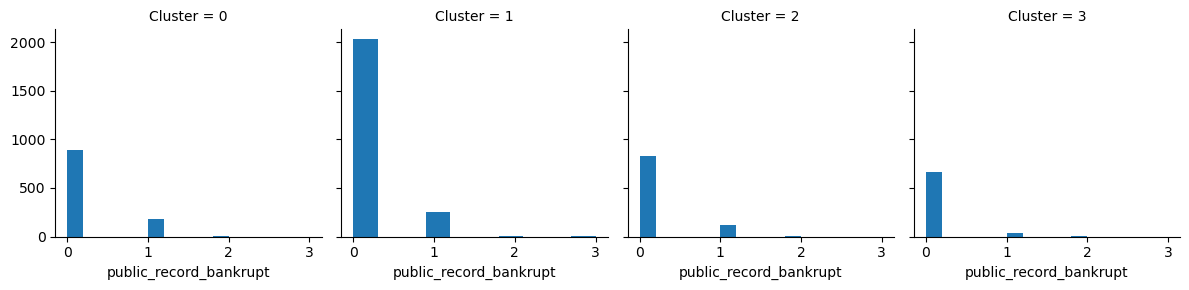

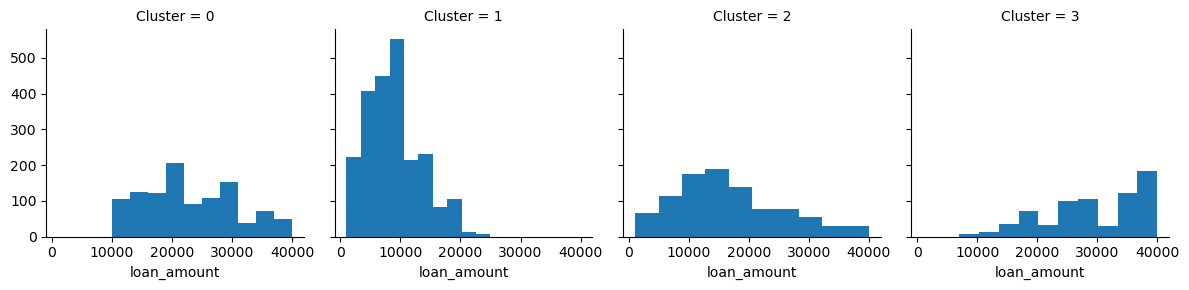

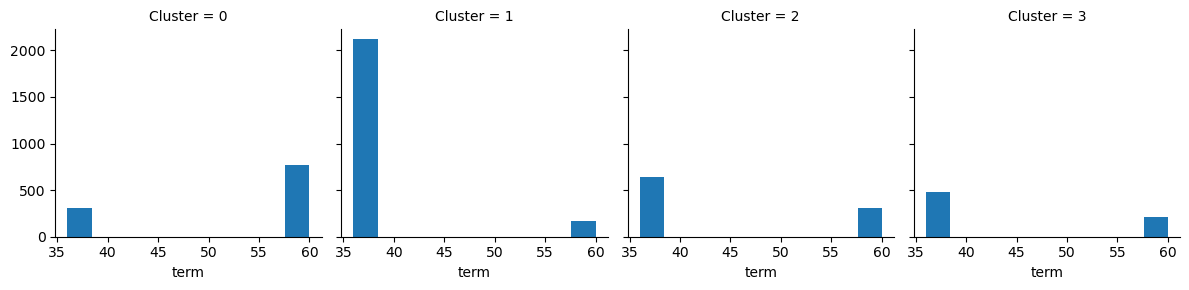

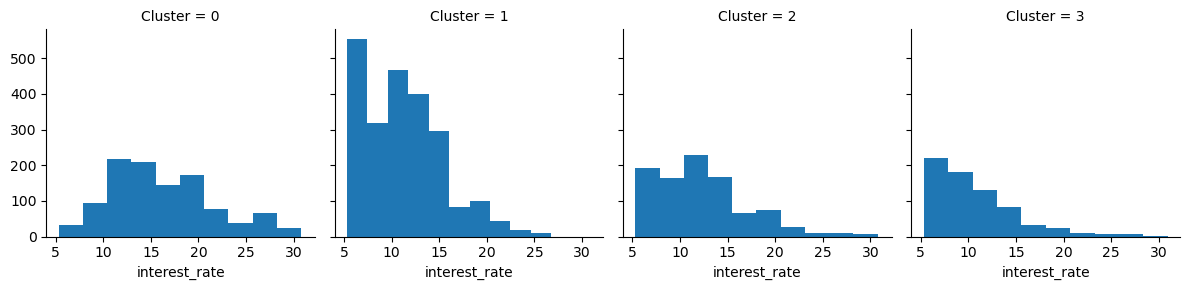

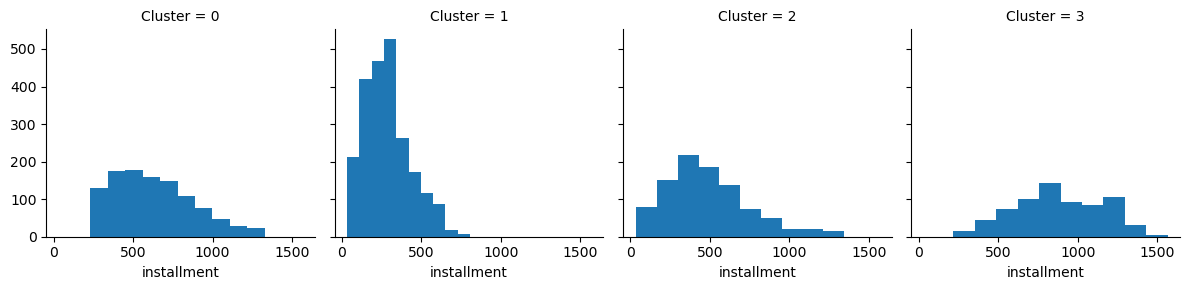

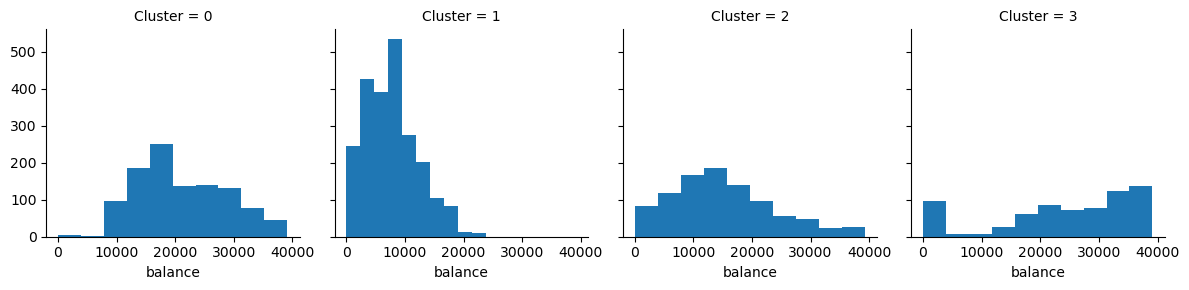

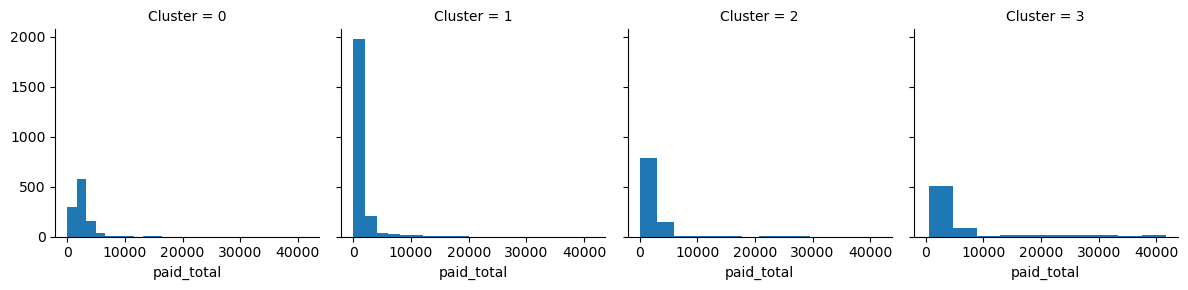

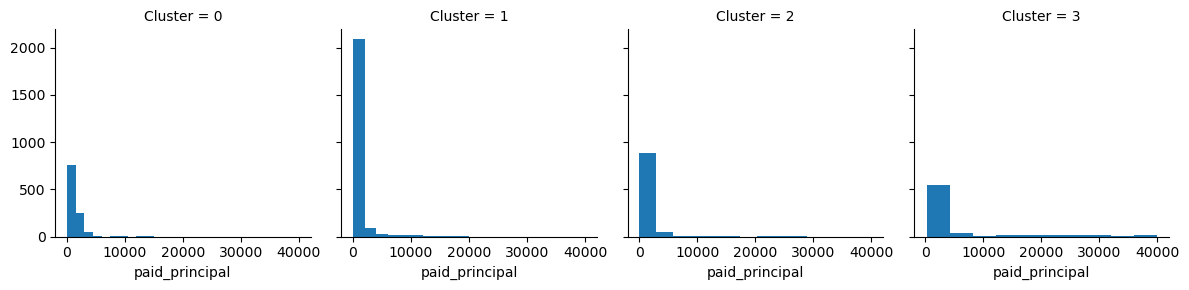

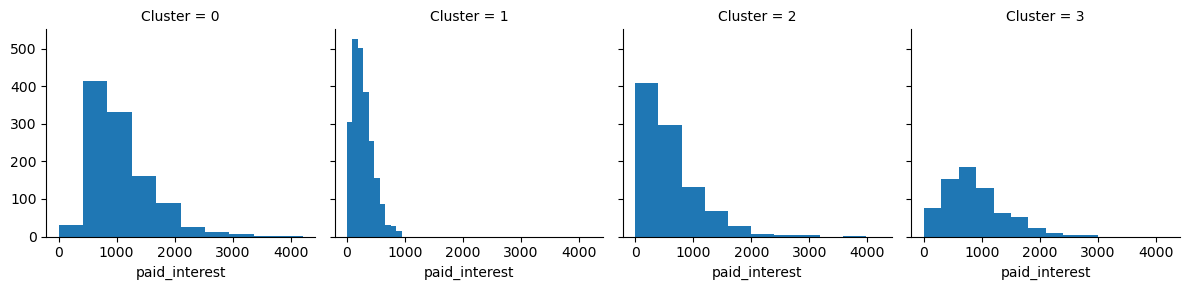

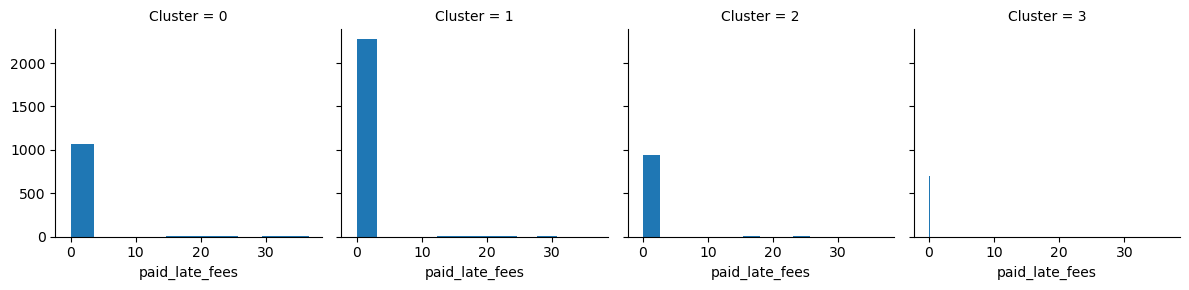

In [1306]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid = sns.FacetGrid(cluster_df, col = 'Cluster')
    grid = grid.map(plt.hist, c)
plt.show()

### Conclusion:
On the basis of the comparison of the various regression model metrics I conclude that the Elastic Net Regression is the best model in predicting the interest rate for personal loans on the basis of the 6 most important numeric features(features having high correlation with the target variable 'interest rate') & 1 categorical feature. 
On the basis of the customer's entire banking relationship I have come up with a few recommendations which would help the bank in raising it's sales and boosting profits. We find 3 different categories under 'homeownership' : Mortgage, Rent & Own. Customers having high annual_income_joint( Cluster 3) and who are renting from this category can be given some promotional offer for mortgage loans as they have a high probability of opting for a mortgage loan in the near future. For customers who already have a mortgage, we can check if it's with our bank or a competing lender. If it's with a competing lender we can try to give them lucrative refinance rates. For customers who own a house, and have high annual_income_joint, we can try to pitch them a mortgage loan for purchasing a second house as investment property. We have seggregated the customers into 4 clusters on the basis of the given features. We see that customers in cluster 3 have higher annual_income_joint, hence we can discuss various savings and wealth management options with them.The Balance kept by the customers in cluster 3 is also higher compared to the other groups & hence we can recommend them to upgrade to the bank's priority service,i.e Private Client Account which requires a higher balance relationship with the bank. We see that the total_credit_limit is the highest for cluster 3 since they have high income and maintain high balance. Loan Amount given is also higher for Cluster 3 (since as security the bank has high balance for them & high income). We should be very careful before giving any more loans to cluster 1 and should judge their eligibility very carefully as num_accounts_120day_past_due, num_accounts_30d_past_due,current_accounts_delinq are highest for cluster 1. Cluster 0 has higher interest rate as the debt_to_income joint is higher for cluster 0. Customers with highest total credit line & open credit line fall in cluster 2 hence we should judge very carefully their eligibility before providing any more loans ( Number of open credit card accounts & credit card accounts carrying a balance are highest for cluster 3).
While the supervised learning methods used in this analysis have helped to determine the optimal interest rate for the personal loans, the unsupervised learning method ( Clustering, i.e seggregating into different customer segments) have helped to provide various marketing & credit recommendations on the basis of the customer's entire banking relationship.
